### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as mo
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('bank.csv',delimiter=';')

In [4]:
df.shape

(4521, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
df.day.nunique()

31

In [11]:
df.job.nunique()

12

In [12]:
df.rename(columns={'y':'target'},inplace=True)

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
df.target.value_counts()

no     4000
yes     521
Name: target, dtype: int64

In [15]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [16]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.campaign.nunique()

32

In [19]:
df.education.nunique()

4

In [20]:
## checking for null values in deep

In [21]:
df.shape

(4521, 17)

In [22]:
#print ("Unique values:\n",df.nunique())

### Data Exploration

In [23]:
for i in df.columns:
    print('Non nulls in ',i,':', sum(pd.value_counts(df[i]).values))

Non nulls in  age : 4521
Non nulls in  job : 4521
Non nulls in  marital : 4521
Non nulls in  education : 4521
Non nulls in  default : 4521
Non nulls in  balance : 4521
Non nulls in  housing : 4521
Non nulls in  loan : 4521
Non nulls in  contact : 4521
Non nulls in  day : 4521
Non nulls in  month : 4521
Non nulls in  duration : 4521
Non nulls in  campaign : 4521
Non nulls in  pdays : 4521
Non nulls in  previous : 4521
Non nulls in  poutcome : 4521
Non nulls in  target : 4521


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

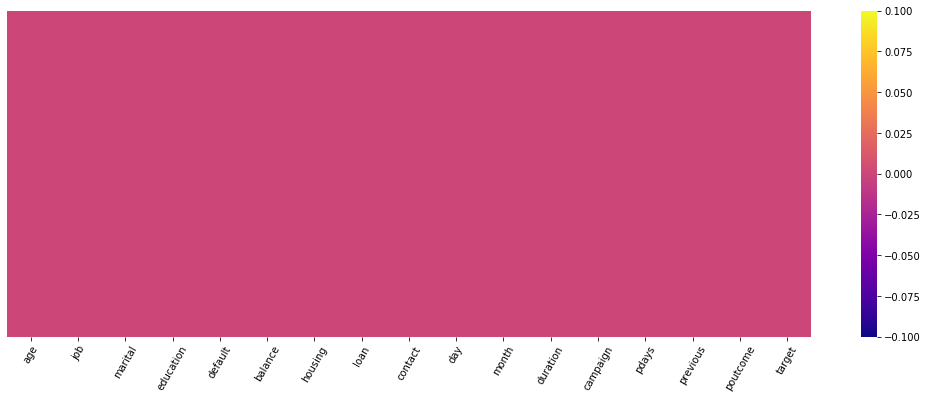

In [24]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),yticklabels=False, xticklabels=df.columns, cmap='plasma') 
plt.xticks(rotation=60)

In [25]:
## from the above we can clearly say there are no null values in any column so we can happily proceed further

In [26]:
data = df.copy(deep=True)

In [27]:
data.shape

(4521, 17)

In [28]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [29]:
for i in df.columns:
    print(i,':\n')
    print(pd.value_counts(df[i]),'\n\n\n')

age :

34    231
32    224
31    199
36    188
33    186
     ... 
76      2
84      1
81      1
86      1
87      1
Name: age, Length: 67, dtype: int64 



job :

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 



marital :

married     2797
single      1196
divorced     528
Name: marital, dtype: int64 



education :

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 



default :

no     4445
yes      76
Name: default, dtype: int64 



balance :

0       357
2        24
1        15
4        13
23       11
       ... 
3472      1
5527      1
1433      1
1445      1
4094      1
Name: balance, Length: 2353, dtype: int64 



housing :

yes    2559
no     1962
Name: housing, dtype: int64 



loan :

no     3830


In [30]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


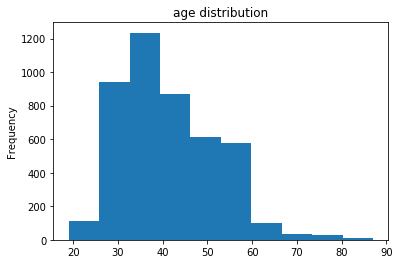

In [31]:
data.age.plot(kind='hist',title='age distribution')

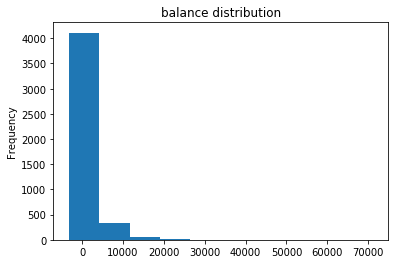

In [32]:
data.balance.plot(kind='hist',title='balance distribution')

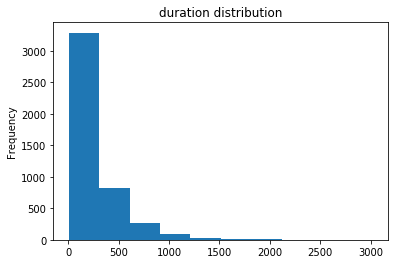

In [33]:
data.duration.plot(kind='hist',title='duration distribution')

In [34]:
cat_cols = data.select_dtypes(exclude=['int64']).columns.values.tolist()

In [35]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'target']

In [36]:
cat_cols.remove('target')

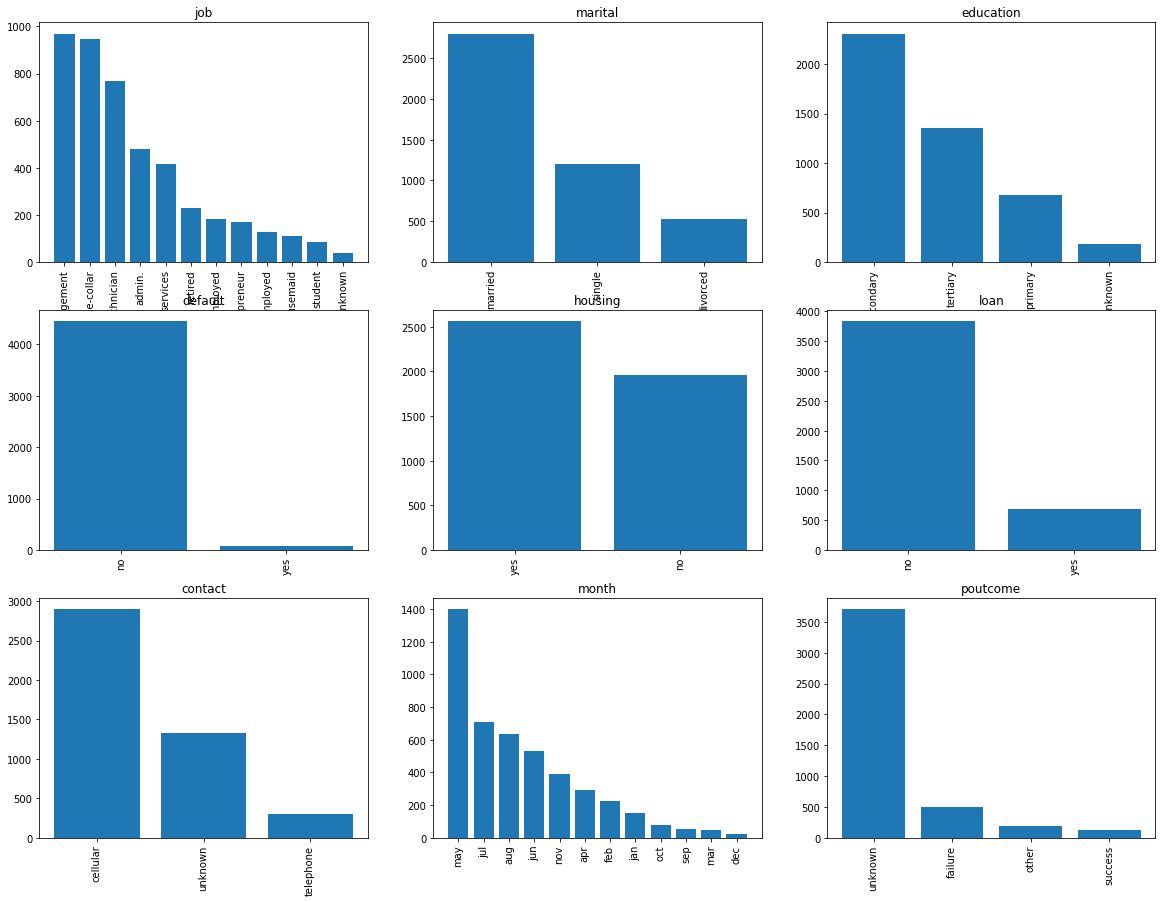

In [37]:
fig, axs = plt.subplots(3,3,figsize=(20,15))
counter=0
for col in cat_cols:
    value_counts = data[col].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    x_pos = np.arange(0,len(value_counts))
    
    axs[trace_x,trace_y].bar(x_pos,value_counts.values, tick_label=value_counts.index)
    axs[trace_x,trace_y].set_title(col)
    
    for tick in axs[trace_x,trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter +=1
    
plt.show()

In [38]:
## from the descriptive statistics done at the begining of the analysis we can observe that pdays
## mean is around 40 days so for every 40 days coustomers are contacted and lets see who are not
## contacted for around a year or more to check the outliers

In [39]:
len(data[data['pdays']>370])

41

In [40]:
len(data[data['pdays']>370]) / len(data)*100

0.90687900906879

In [41]:
len(data[data['pdays']>400]) /( len(data))*100

0.57509400575094

In [42]:
dfc = data[data['pdays'] > 370]
dfc.shape

(41, 17)

In [43]:
dfc

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
83,52,services,married,secondary,no,657,no,no,telephone,7,jul,398,2,460,2,failure,yes
148,46,admin.,married,secondary,no,179,yes,no,cellular,29,jan,194,4,436,1,other,no
212,38,technician,married,tertiary,no,432,yes,no,cellular,15,may,10,2,373,1,other,no
325,33,technician,married,secondary,no,6699,no,no,cellular,9,nov,425,1,462,1,failure,no
596,47,housemaid,married,primary,no,201,yes,no,cellular,7,aug,58,2,382,1,failure,no
883,45,entrepreneur,married,primary,no,58,yes,no,telephone,13,may,119,3,371,3,failure,no
970,58,self-employed,married,primary,no,1013,yes,no,cellular,11,aug,206,1,461,1,failure,yes
999,20,student,single,secondary,no,291,no,no,telephone,11,may,172,5,371,5,failure,no
1106,35,blue-collar,married,secondary,no,137,no,yes,unknown,4,oct,5,1,808,12,failure,no
1109,59,technician,married,secondary,no,1,no,no,cellular,15,apr,159,2,378,3,failure,yes


In [44]:
len(data[data['pdays']>370])

41

In [45]:
len(data[data['pdays']>370])/len(data) *100

0.90687900906879

In [46]:
## From the above we can observe that around 41 people 0.9 percent of people are likely to be outliers but let's go into deep

In [47]:
data.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
28       3
24       3
20       3
19       3
21       2
23       2
22       2
32       2
29       1
44       1
30       1
50       1
31       1
Name: campaign, dtype: int64

In [48]:
len(data[data['campaign']>34])

2

In [49]:
## only 2 people were contacted more than 34 times for the campaign

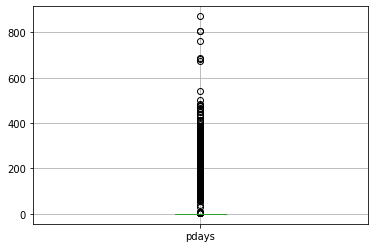

In [50]:
data.boxplot(column=['pdays'])

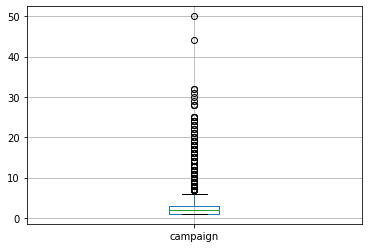

In [51]:
data.boxplot(column=['campaign'])

In [52]:
## It looks like boxplot is not providing much valuable information regarding the outliers

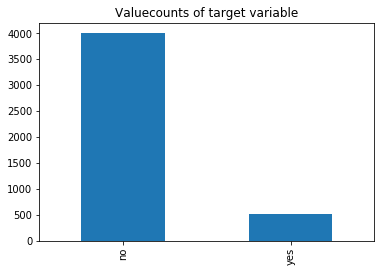

In [53]:
data.target.value_counts().plot(kind='bar',title='Valuecounts of target variable')

### Multivariate analysis

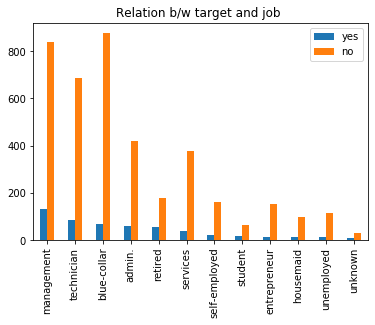

In [54]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['target'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['target'] == 'no']['job'].value_counts()

j_df.plot.bar(title='Relation b/w target and job ')

In [55]:
### It looks like more of management, technician, blue-collar job people have
### opted for the term desposit subscription as they earn more than other people

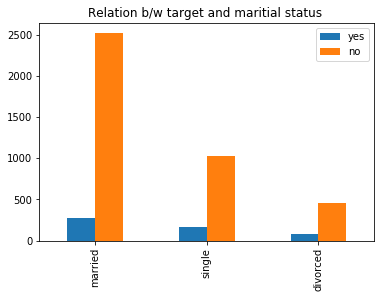

In [56]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['target'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['target'] == 'no']['marital'].value_counts()

j_df.plot.bar(title='Relation b/w target and maritial status ')

In [57]:
### It looks like more of married people have taken the term deposit subscription
### more of the safety purpose may be & if we target more the married people from
### the next time onwards it will be benificial for us

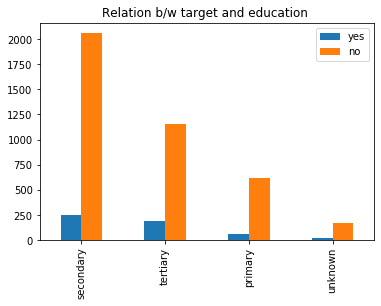

In [58]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['target'] == 'yes']['education'].value_counts()
j_df['no'] = data[data['target'] == 'no']['education'].value_counts()

j_df.plot.bar(title='Relation b/w target and education ')

In [59]:
### And here eventhough we have the secondary education people highest deposit but looks like the 
### percentage of people category turned out is who has teritary education as total count is less
### compared to secondary so next time contacting teritary education people might benifit us

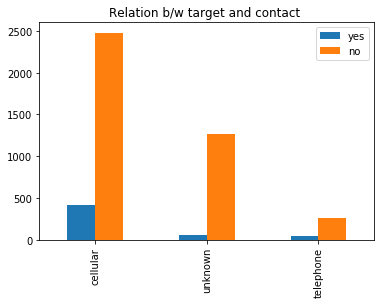

In [60]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['target'] == 'yes']['contact'].value_counts()
j_df['no'] = data[data['target'] == 'no']['contact'].value_counts()

j_df.plot.bar(title='Relation b/w target and contact ')

In [61]:
### The people who have been contacted through cellular phone have turned out to take more term deposit 
### compared to other modes of contact 

In [62]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

### Multivariate analysis on numerical variables

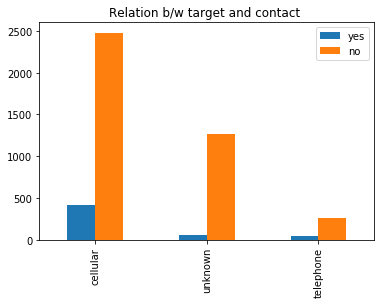

In [63]:
b_df = pd.DataFrame()

b_df['yes'] = data[data['target'] == 'yes']['contact'].value_counts()
b_df['no'] = data[data['target'] == 'no']['contact'].value_counts()

b_df.plot.bar(title='Relation b/w target and contact ')

In [64]:
data[['balance','target']]

,balance,target
0,1787,no
1,4789,no
2,1350,no
3,1476,no
4,0,no
...,...,...
4516,-333,no
4517,-3313,no
4518,295,no
4519,1137,no


In [65]:
b_df = pd.DataFrame()
b_df['b_yes'] = (data[data['target'] =='yes'][['target','balance']].describe())['balance']
b_df['b_no'] = (data[data['target'] =='no'][['target','balance']].describe())['balance']

b_df

,b_yes,b_no
count,521.000000,4000.000000
mean,1571.955854,1403.211750
std,2444.398956,3075.349313
min,-1206.000000,-3313.000000
25%,171.000000,61.000000
50%,710.000000,419.500000
75%,2160.000000,1407.000000
max,26965.000000,71188.000000


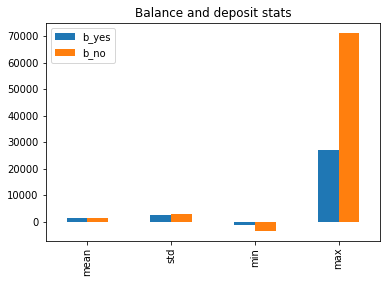

In [66]:
b_df.drop(['count','25%','50%','75%']).plot.bar(title='Balance and deposit stats')

In [67]:
a_df = pd.DataFrame()

a_df['age_yes'] = (data[data['target']=='yes'][['target','age']].describe())['age']
a_df['age_no'] = (data[data['target']=='no'][['target','age']].describe())['age']

a_df

,age_yes,age_no
count,521.000000,4000.000000
mean,42.491363,40.998000
std,13.115772,10.188398
min,19.000000,19.000000
25%,32.000000,33.000000
50%,40.000000,39.000000
75%,50.000000,48.000000
max,87.000000,86.000000


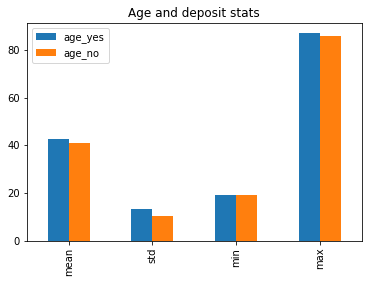

In [68]:
a_df.drop(['count','25%','50%','75%']).plot.bar(title='Age and deposit stats')

In [69]:
data.campaign.value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
28       3
24       3
20       3
19       3
21       2
23       2
22       2
32       2
29       1
44       1
30       1
50       1
31       1
Name: campaign, dtype: int64

In [70]:
df2 = data

In [71]:
df2.previous.value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
24       1
23       1
13       1
17       1
19       1
18       1
22       1
15       1
25       1
Name: previous, dtype: int64

In [72]:
df2.shape

(4521, 17)

In [73]:
df2 = df2[df2['campaign']<34]
df2 = df2[df2['previous']<34]
df2.shape

(4519, 17)

In [74]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [75]:
df2.marital.value_counts()

married     2795
single      1196
divorced     528
Name: marital, dtype: int64

In [76]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

### Data cleaning

In [77]:
def get_dummy_from_bool(row,col_name):
    return 1 if row[col_name] == 'yes' else 0

def clean_df(df):
    cleaned_df = df2.copy()
    
    bool_columns = ['default','housing','loan','target']
    
    for bool_col in bool_columns:
        cleaned_df[bool_col+'_bool'] = df.apply(lambda row:get_dummy_from_bool(row,bool_col),axis=1)
        
    cleaned_df = cleaned_df.drop(columns=bool_columns)
    
    cat_cols = ['job','marital','education','contact','month','poutcome']
    
    for cat_col in cat_cols:
        cleaned_df = pd.concat([cleaned_df,(pd.get_dummies(cleaned_df[cat_col], prefix=col,prefix_sep='_',drop_first=True,dummy_na=False))],axis=1)
        
        cleaned_df = cleaned_df.drop(cat_col,axis=1)
    cleaned_df = cleaned_df.drop(['pdays'],axis=1)

    return cleaned_df
    
    

In [78]:
cleaned_df = clean_df(df2)
cleaned_df.shape

(4519, 42)

In [79]:
cleaned_df.head()

,age,balance,day,duration,campaign,previous,default_bool,housing_bool,loan_bool,target_bool,...,poutcome_jul,poutcome_jun,poutcome_mar,poutcome_may,poutcome_nov,poutcome_oct,poutcome_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,4,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [80]:
cleaned_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'default_bool', 'housing_bool', 'loan_bool', 'target_bool',
       'poutcome_blue-collar', 'poutcome_entrepreneur', 'poutcome_housemaid',
       'poutcome_management', 'poutcome_retired', 'poutcome_self-employed',
       'poutcome_services', 'poutcome_student', 'poutcome_technician',
       'poutcome_unemployed', 'poutcome_unknown', 'poutcome_married',
       'poutcome_single', 'poutcome_secondary', 'poutcome_tertiary',
       'poutcome_unknown', 'poutcome_telephone', 'poutcome_unknown',
       'poutcome_aug', 'poutcome_dec', 'poutcome_feb', 'poutcome_jan',
       'poutcome_jul', 'poutcome_jun', 'poutcome_mar', 'poutcome_may',
       'poutcome_nov', 'poutcome_oct', 'poutcome_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [81]:
cleaned_df.target_bool.value_counts()

0    3998
1     521
Name: target_bool, dtype: int64

### Building the model

In [82]:
data.previous.value_counts()

0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
24       1
23       1
13       1
17       1
19       1
18       1
22       1
15       1
25       1
Name: previous, dtype: int64

In [95]:
X = cleaned_df.drop(columns='target_bool')
y = cleaned_df[['target_bool']]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [97]:
X = pd.concat([X_train, y_train], axis=1)

In [98]:
df.target.value_counts()

no     4000
yes     521
Name: target, dtype: int64

In [99]:
X.shape,X.target_bool.value_counts()

((3163, 42),
 0    2799
 1     364
 Name: target_bool, dtype: int64)

In [100]:
X_test.shape

(1356, 41)

### Resampling to solve imbalance

In [101]:
from sklearn.utils import resample

not_subscribed = X[X.target_bool==0]
subscribed = X[X.target_bool==1]

# upsample minority
data_upsampled = resample(subscribed,
                          replace=True, # sample with replacement
                          n_samples=len(not_subscribed), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_subscribed, data_upsampled])

# check new class counts
upsampled.target_bool.value_counts()

1    2799
0    2799
Name: target_bool, dtype: int64

In [103]:
upsampled.shape

(5598, 42)

In [104]:
y_train = upsampled.target_bool
X_train = upsampled.drop('target_bool', axis=1)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm

In [106]:
logreg = LogisticRegression()

In [107]:
logreg.fit(X_train, y_train)

D:\softwares\AnacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [108]:
## test accuracy
logreg.score(X_test, y_test)

0.8207964601769911

In [109]:
y_train.shape

(5598,)

In [110]:
# test accuracy
logreg.score(X_test, y_test)

0.8207964601769911

In [111]:
y_test.shape

(1356, 1)

In [113]:
y_pred = logreg.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[990 209]
 [ 34 123]]


In [115]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1199
           1       0.37      0.78      0.50       157

    accuracy                           0.82      1356
   macro avg       0.67      0.80      0.70      1356
weighted avg       0.90      0.82      0.85      1356



In [116]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
SVM.predict(X_test)
round(SVM.score(X_test,y_test), 4)

D:\softwares\AnacondaFiles\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.885

In [117]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test,y_test), 4)

0.7507

In [118]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
print('MLP',round(NN.score(X_test, y_test), 4))

MLP 0.6239


D:\softwares\AnacondaFiles\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [119]:
from sklearn.tree import DecisionTreeClassifier 

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
print('RandomForest',round(RF.score(X_test, y_test), 4))
DT = DecisionTreeClassifier().fit(X_train, y_train)
DT.predict(X_test)
print('Decsiontree',round(DT.score(X_test, y_test), 4))

RandomForest 0.8569
Decsiontree 0.8643


In [120]:
importance=RF.feature_importances_

In [121]:
feature_imp=pd.DataFrame({'columns':X_test.columns,'importances':np.round(importance,2)})
feature_imp.sort_values(by='importances', ascending=False)

,columns,importances
3,duration,0.41
1,balance,0.07
0,age,0.06
26,poutcome_unknown,0.05
2,day,0.04
39,poutcome_success,0.04
4,campaign,0.03
5,previous,0.03
36,poutcome_oct,0.03
34,poutcome_may,0.02


#### Applying SMOTE as oversampling is naive eventhough we get the good results but cannot trust entirely

In [142]:
cleaned_df.shape

(4519, 42)

In [143]:
X = cleaned_df.drop(columns='target_bool')
y = cleaned_df[['target_bool']]

In [144]:
X.shape,y.shape

((4519, 41), (4519, 1))

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [328]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train.values, y_train)

### combining smote with tomek links

In [329]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train.values,y_train)

D:\softwares\AnacondaFiles\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [330]:
logreg = LogisticRegression()

In [331]:
logreg.fit(X_train_ns, y_train_ns)

D:\softwares\AnacondaFiles\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\softwares\AnacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [332]:
y_pred = logreg.predict(X_test)

In [333]:
y_test.shape

(1130, 1)

In [334]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[912  88]
 [ 62  68]]


In [335]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1000
           1       0.44      0.52      0.48       130

    accuracy                           0.87      1130
   macro avg       0.69      0.72      0.70      1130
weighted avg       0.88      0.87      0.87      1130



In [336]:
logreg.score(X_test, y_test)

0.8672566371681416

In [337]:
SVM = svm.LinearSVC()
SVM.fit(X_train_ns, y_train_ns)
SVM.predict(X_test)
round(SVM.score(X_test,y_test), 4)

D:\softwares\AnacondaFiles\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\softwares\AnacondaFiles\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8354

In [338]:
y_pred = SVM.predict(X_test)

In [339]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[864 136]
 [ 50  80]]


In [340]:
print(classification_report(y_test, SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1000
           1       0.37      0.62      0.46       130

    accuracy                           0.84      1130
   macro avg       0.66      0.74      0.68      1130
weighted avg       0.88      0.84      0.85      1130



In [341]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train_ns, y_train_ns)
RF.predict(X_test)
round(RF.score(X_test,y_test), 4)

D:\softwares\AnacondaFiles\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8611

In [342]:
y_pred = RF.predict(X_test)

In [343]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[930  70]
 [ 87  43]]


In [344]:
print(classification_report(y_test, RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1000
           1       0.38      0.33      0.35       130

    accuracy                           0.86      1130
   macro avg       0.65      0.63      0.64      1130
weighted avg       0.85      0.86      0.86      1130



#### From all the above algorithms results we can see the logistic regression seems to be performing good as the accuracy is around 86 and also the precision, recall for one class is very good and for another class is less but we can go with it as the data samples for this class is very less

In [348]:
probs = logreg.predict_proba(X_test)
probs = probs[:, 1]

In [350]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.85


In [352]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

In [354]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

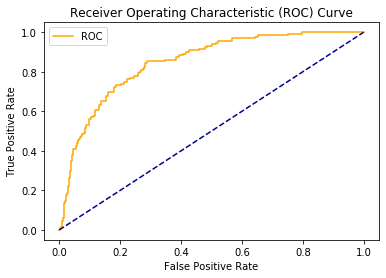

In [355]:
plot_roc_curve(fpr, tpr)

#### We can see from the AUC-ROC Curve the model is performing decently